In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [23]:
df = pd.read_csv('output1.csv')
df.head()

,Input Sizes,Key Comparison,Time Taken(ms)
0,1000,8519,364.0
1,2000,18998,673.0
2,3000,29985,1050.0
3,4000,41781,1378.0
4,5000,54829,1751.0


In [24]:
x = df['Input Sizes']
y = df['Key Comparison']

In [25]:
n_values = x.unique()
theoretical_values = n_values * np.log2(n_values / 10) + 1 / 4 * n_values * 10


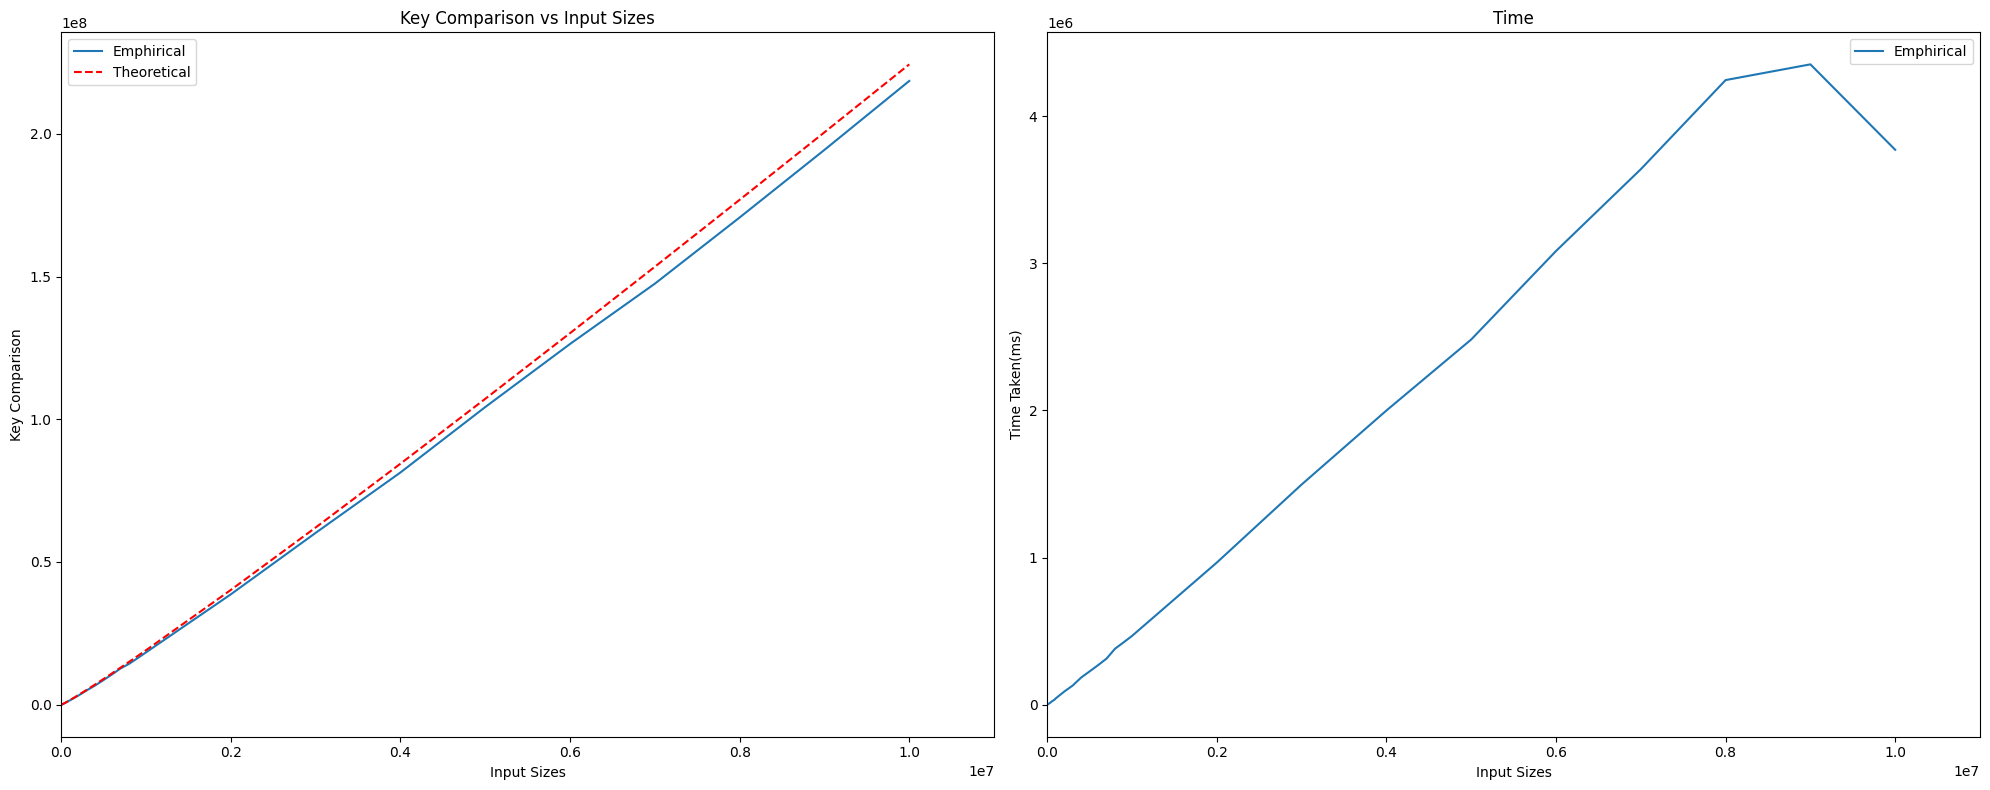

In [26]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sb.lineplot(y=y, x=x, ax=ax[0], label="Emphirical")
ax[0].set_title("Key Comparison vs Input Sizes")  # set title for first subplot

# Plot the theoretical analysis curve
ax[0].plot(
    n_values, theoretical_values, label="Theoretical", linestyle="--", color="red"
)
ax[0].legend()  # Add a legend to the plot

# line plot for time
sb.lineplot(
    y=df['Time Taken(ms)'],
    x=x,
    ax=ax[1],  # use the second subplot
    label="Emphirical",
)
ax[1].set_title("Time")  # set title for second subplot

# Set x-axis limits to show from 0 to 50,000,000
x_min = 0
x_max = 11_000_000  # Use underscores for readability

ax[0].set_xlim(x_min, x_max)
ax[1].set_xlim(x_min, x_max)

# tight layout to prevent overlapping
plt.tight_layout()

plt.show()

In [27]:
def theoretical(n, S):
    return n * np.log2(n / S) + 1 / 4 * S * n

In [28]:
df2 = pd.read_csv("output2.csv")

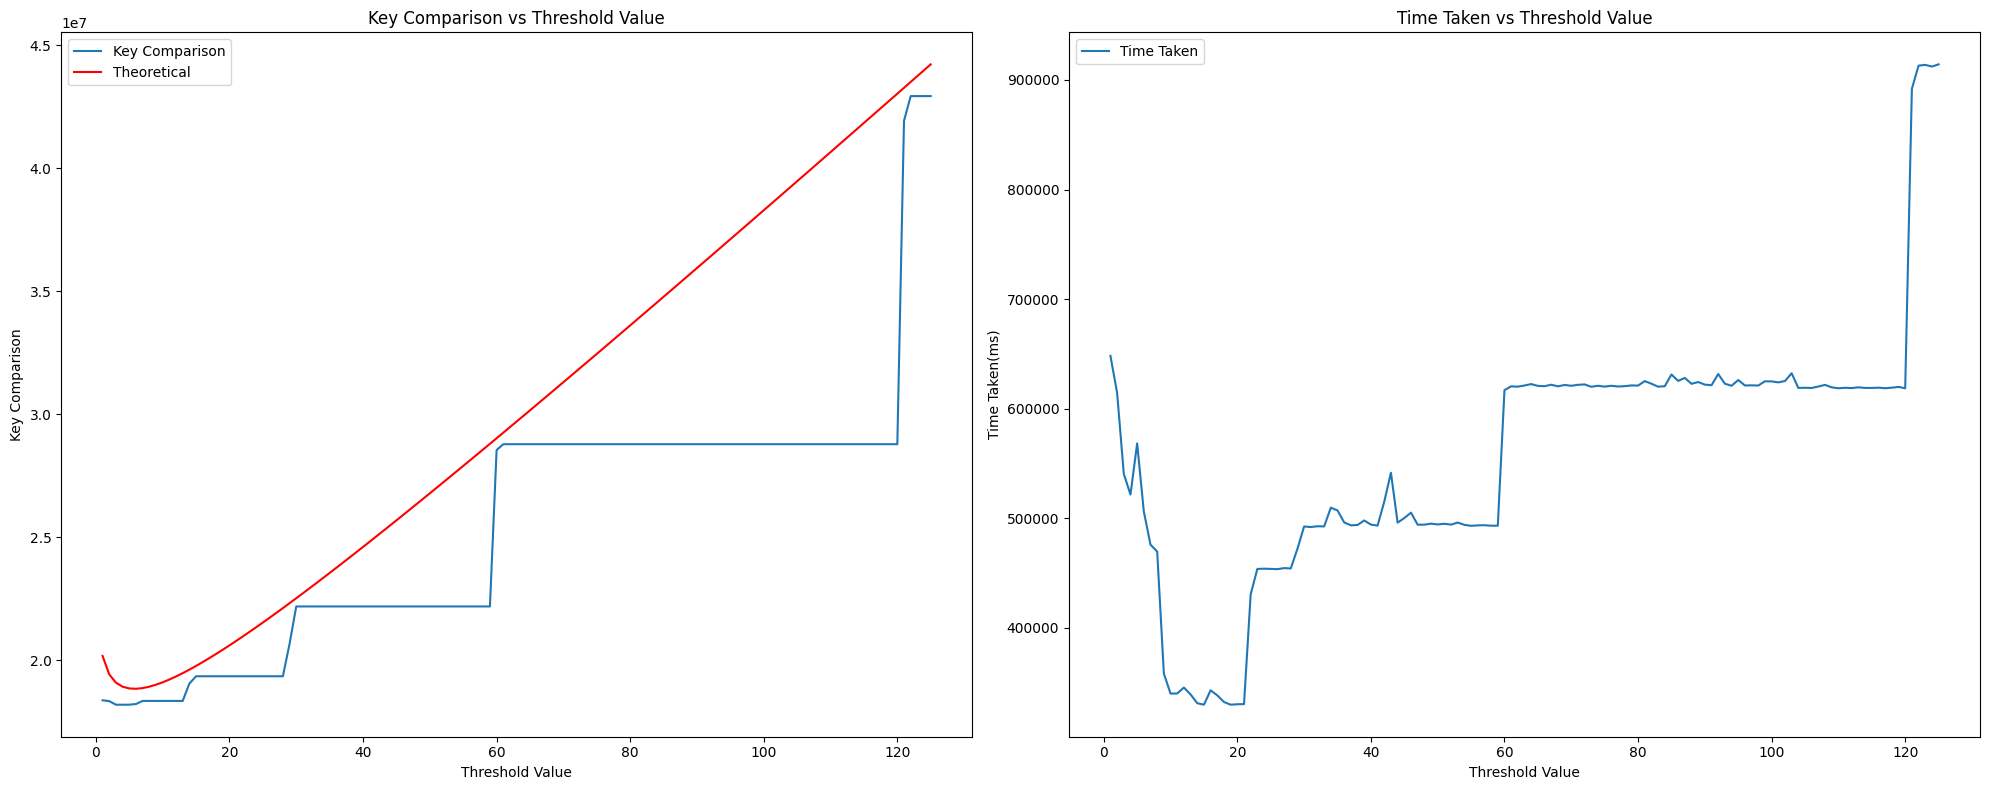

In [29]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Line plot for key comparison
lineKey = sb.lineplot(data=df2, y="Key Comparison", x="Threshold Value", ax=ax[0], label='Key Comparison')
x = df2["Threshold Value"]
y = theoretical(1000000, x)
sb.lineplot(x=x, y=y, ax=ax[0], color="red", label='Theoretical')
ax[0].legend()
ax[0].set_title("Key Comparison vs Threshold Value")

# Line plot for time
lineTime = sb.lineplot(data=df2, y="Time Taken(ms)", x="Threshold Value", ax=ax[1], label='Time Taken')
ax[1].set_title("Time Taken vs Threshold Value")

# Layout so plots do not overlap
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
    # Optimal Threshold S is determined as the largest value of S where the number of key comparisons in Insertion is less than Merge